# Morphological Operations

Our vague definition:

> Set of image processing operations that process images based on shapes. Morphological operation apply **structuring element** (some times also called kernel) to an input image, creating an output image of the same size. Each pixel value of the output image is a function of the whole neighbourhood of the same pixel of the input image.

Normally, morphological operations are performed on **binary images**.

The two most basic operations are:
1. **dilatation** - adding pixels to the boundaries of objects in an input image
1. **erosion** - removing pixels on the boundaries of objects in an input image


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

## Dilatation (at least one pixel has to be 1)

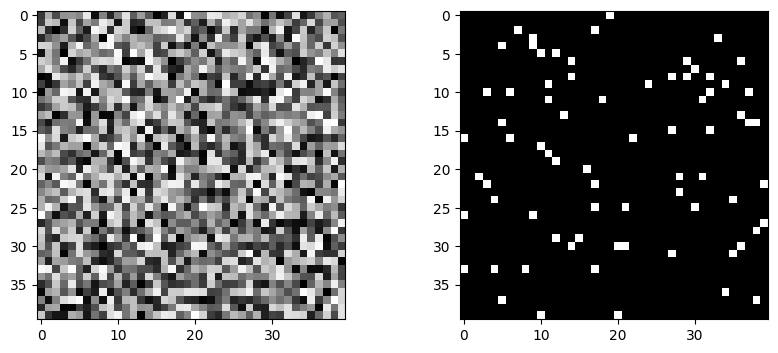

In [2]:
# create random image, binary mask, visualize
img = np.random.rand(40,40)
binary_img = (img > 0.95).astype(np.uint8) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(binary_img, cmap="gray", vmin=0, vmax=255)


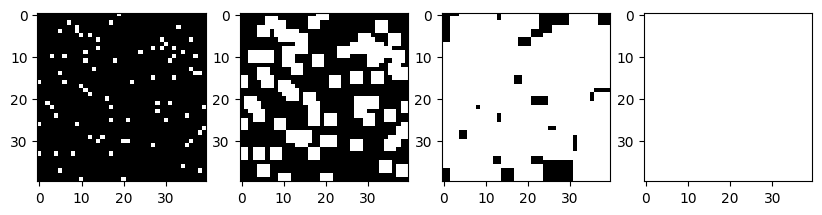

In [3]:
kernel = np.ones((3,3), np.uint8) # structuring element 
dilation1 = cv.dilate(binary_img, kernel, iterations=1)
dilation3 = cv.dilate(binary_img, kernel, iterations=3)
dilation10 = cv.dilate(binary_img, kernel, iterations=10)

plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.imshow(binary_img, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,4,2)
plt.imshow(dilation1, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,4,3)
plt.imshow(dilation3, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,4,4)
plt.imshow(dilation10, cmap="gray", vmin=0, vmax=255)

# Erosion (all pixels have to be 1)

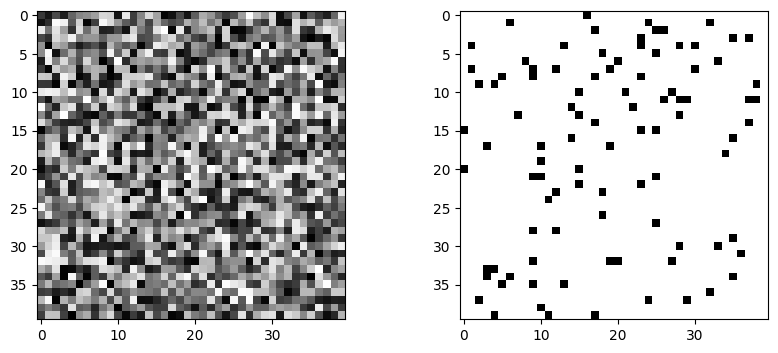

In [4]:
# create random image, binary mask, visualize
img = np.random.rand(40,40)
binary_img = (img > 0.05).astype(np.uint8) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(binary_img, cmap="gray", vmin=0, vmax=255)

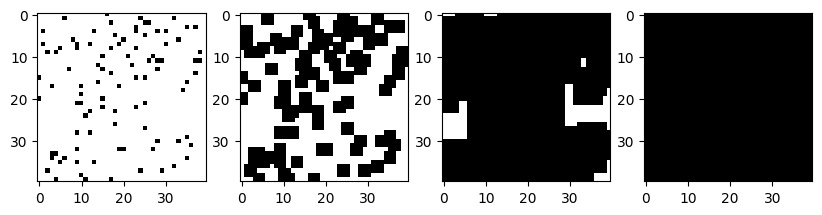

In [5]:
kernel = np.ones((3,3), np.uint8) # structuring element 
erosion1 = cv.erode(binary_img, kernel, iterations=1)
erosion3 = cv.erode(binary_img, kernel, iterations=3)
erosion10 = cv.erode(binary_img, kernel, iterations=10)

plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.imshow(binary_img, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,4,2)
plt.imshow(erosion1, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,4,3)
plt.imshow(erosion3, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,4,4)
plt.imshow(erosion10, cmap="gray", vmin=0, vmax=255)

## Two basic combination of dilatation and erosion

1. **opening** - erosion followed by dilation, usefull for removing noise from background
1. **closing** - dilation followed by erosion, usefull for removing holes in objects

In [6]:
img_path = os.path.join("data", "coins.jpg")
img = cv.imread(img_path)
img_color = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

### Opening

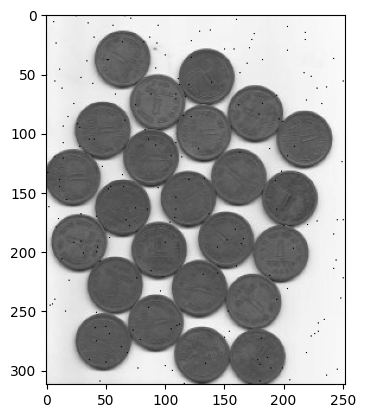

In [7]:
# add random minimum intensity pixels (to affect background)
img = np.copy(img_gray)
rows, cols = np.shape(img)
for i in range(200):
    i = np.random.randint(0, rows)
    j = np.random.randint(0, cols)
    img[i,j] = 0

plt.imshow(img, cmap="gray")


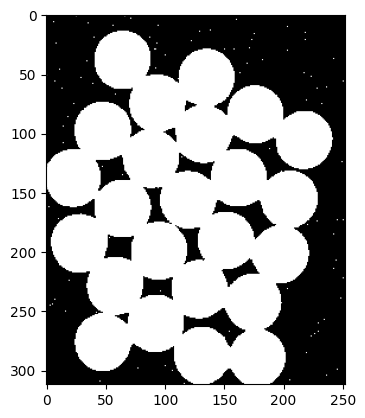

In [8]:
threshold, img_binary = cv.threshold(img, 155, 255, cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
plt.imshow(img_binary, cmap="gray")

In [9]:
coins_open = cv.morphologyEx(img_binary, cv.MORPH_OPEN, kernel=kernel, iterations=1)

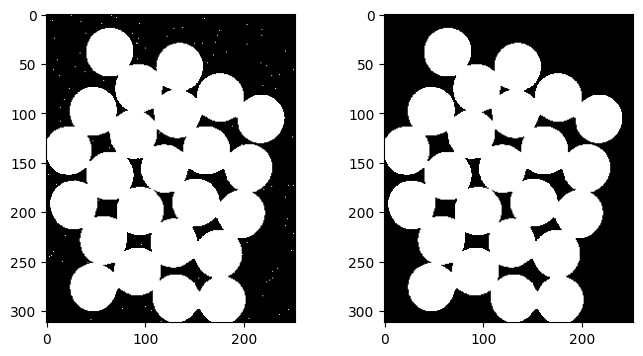

In [10]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_binary, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(coins_open, cmap="gray", vmin=0, vmax=255)

### Closing

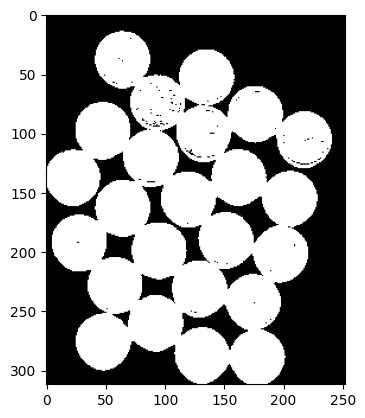

In [11]:
threshold, img_binary = cv.threshold(img_gray, 110, 255, cv.THRESH_BINARY_INV)
plt.imshow(img_binary, cmap="gray")

In [12]:
coins_close = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel=kernel, iterations=1)

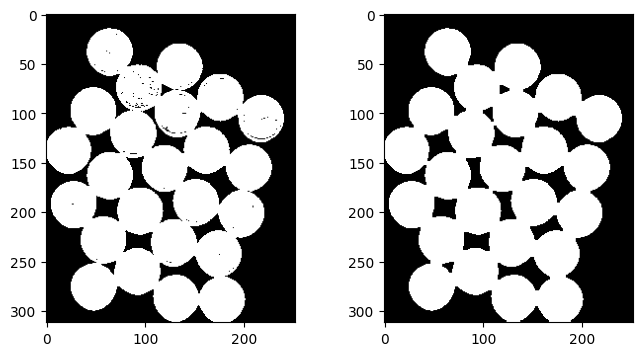

In [13]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_binary, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(coins_close, cmap="gray", vmin=0, vmax=255)

## Other interesting morphological operations (there are many)

1. Morphological Gradient - difference, between dilation and erosion
1. skeletonize

In [14]:
threshold, img_binary = cv.threshold(img_gray, 155, 255, cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
coins_gradient = cv.morphologyEx(img_binary, cv.MORPH_GRADIENT, kernel)

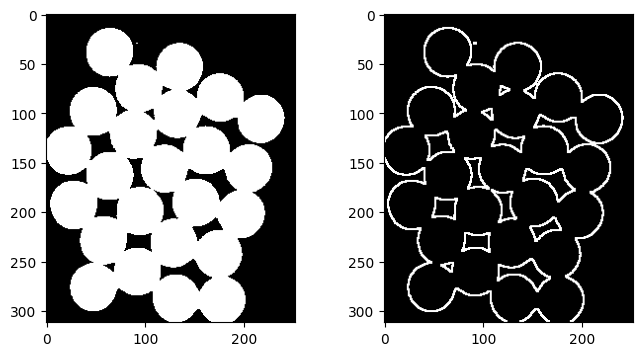

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_binary, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(coins_gradient, cmap="gray", vmin=0, vmax=255)

### Skeletonize

In [16]:
def skeletonize(img):
    """ OpenCV function to return a skeletonized version of img, a Mat object"""

    #  hat tip to http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/

    img = img.copy()
    skel = img.copy()

    skel[:,:] = 0
    kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

    while True:
        eroded = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)
        temp = cv.morphologyEx(eroded, cv.MORPH_DILATE, kernel)
        temp  = cv.subtract(img, temp)
        skel = cv.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]
        if cv.countNonZero(img) == 0:
            break

    return skel

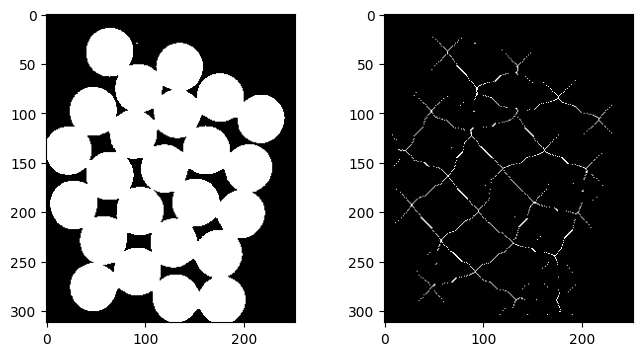

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_binary, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(skeletonize(img_binary), cmap="gray", vmin=0, vmax=255)

### Custom Structuring Elemenets (Kernels)

1. Rectangle
1. Elipse
1. Cross

In [22]:
kernel_rectangle = cv.getStructuringElement(cv.MORPH_RECT, (9,9))
kernel_elipse = cv.getStructuringElement(cv.MORPH_ELLIPSE, (9,9))
kernel_cross = cv.getStructuringElement(cv.MORPH_CROSS, (9,9))

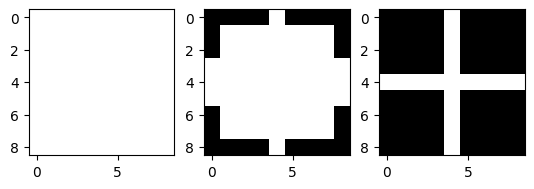

In [24]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(kernel_rectangle, cmap="gray", vmin=0, vmax=1)
plt.subplot(1, 3, 2)
plt.imshow(kernel_elipse, cmap="gray", vmin=0, vmax=1)
plt.subplot(1, 3, 3)
plt.imshow(kernel_cross, cmap="gray", vmin=0, vmax=1)